In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

sys.path.append('../')
from plotting.plotting_helpers import *
from metrics.covariance_metric_helpers import compute_empirical_cov

In [123]:
data = pd.read_csv('../test_samples/synthetic/sghmc.csv')
n = data.shape[0]
d_dash = data.shape[1]
sghmc_samples = np.zeros((n,d_dash))
for i, row in data.iterrows():
    sghmc_samples[i] = row

In [124]:
data = pd.read_csv('../test_samples/synthetic/ls_1e5.csv')
n = data.shape[0]
d_dash = data.shape[1]
ls_samples_1e5 = np.zeros((n,d_dash))
for i, row in data.iterrows():
    ls_samples_1e5[i] = row

In [125]:
data = pd.read_csv('../test_samples/synthetic/ls_1e6_3000.csv')
n = data.shape[0]
d_dash = data.shape[1]
ls_samples_1e6 = np.zeros((n,d_dash))
for i, row in data.iterrows():
    ls_samples_1e6[i] = row

In [126]:
data = pd.read_csv('../test_samples/synthetic/ls_1e4.csv')
n = data.shape[0]
d_dash = data.shape[1]
ls_samples_1e4 = np.zeros((n,d_dash))
for i, row in data.iterrows():
    ls_samples_1e4[i] = row

In [127]:
data = pd.read_csv('../test_samples/synthetic/sghmc_3.csv')
n = data.shape[0]
d_dash = data.shape[1]
sghmc_samples_3 = np.zeros((n,d_dash))
for i, row in data.iterrows():
    sghmc_samples_3[i] = row

In [128]:
data = pd.read_csv('../test_samples/synthetic/sghmc_2.csv')
n = data.shape[0]
d_dash = data.shape[1]
sghmc_samples_2 = np.zeros((n,d_dash))
for i, row in data.iterrows():
    sghmc_samples_2[i] = row

In [129]:
data = pd.read_csv('../test_samples/synthetic/sghmc_cov.csv')
cov = np.zeros((d_dash,d_dash))
for i, row in data.iterrows():
    cov[i] = row

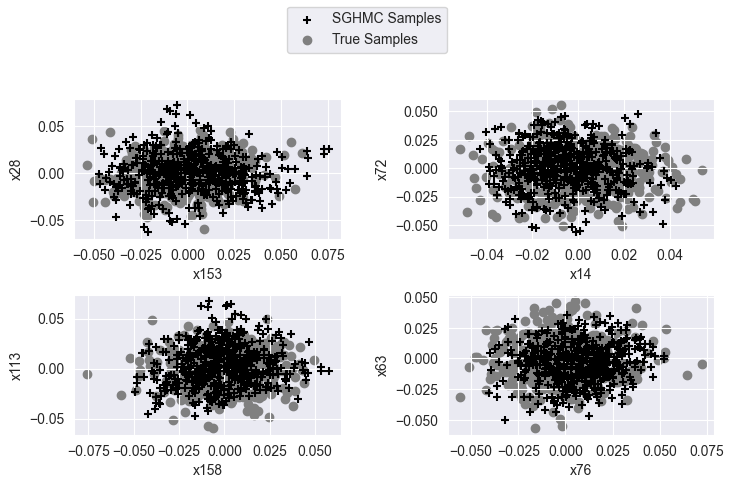

In [130]:
fig, ax = samples_and_true_samples(sghmc_samples[:500], 2, cov, np.zeros(cov.shape[0]), type='sghmc')

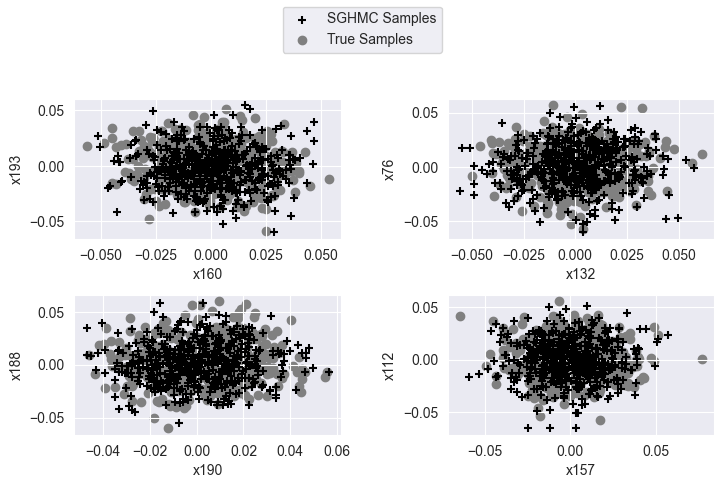

In [131]:
fig, ax = samples_and_true_samples(sghmc_samples_2[:500], 2, cov, np.zeros(cov.shape[0]), type='sghmc')

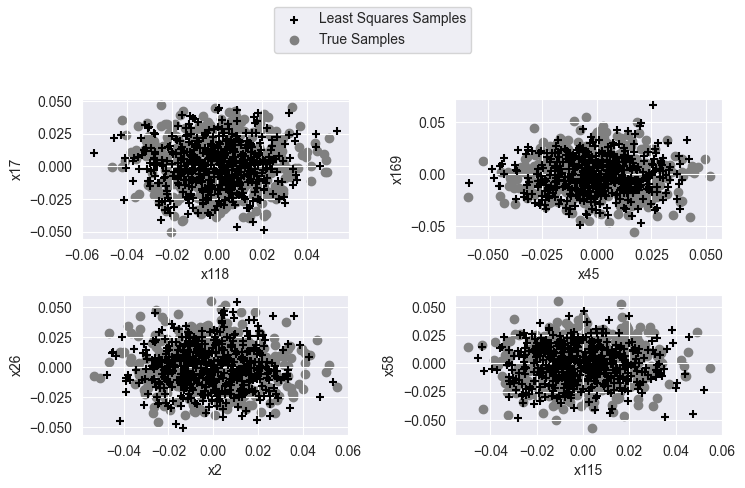

In [132]:
fig, ax = samples_and_true_samples(ls_samples_1e5[:500], 2, cov, np.zeros(cov.shape[0]))

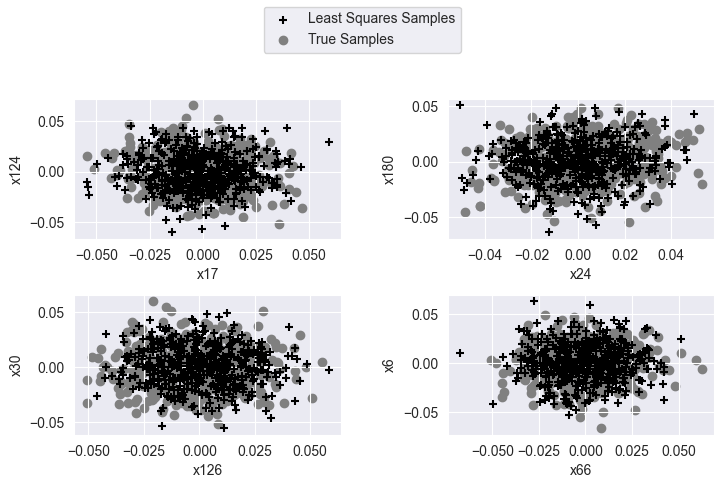

In [133]:
fig, ax = samples_and_true_samples(ls_samples_1e6[:500], 2, cov, np.zeros(cov.shape[0]))

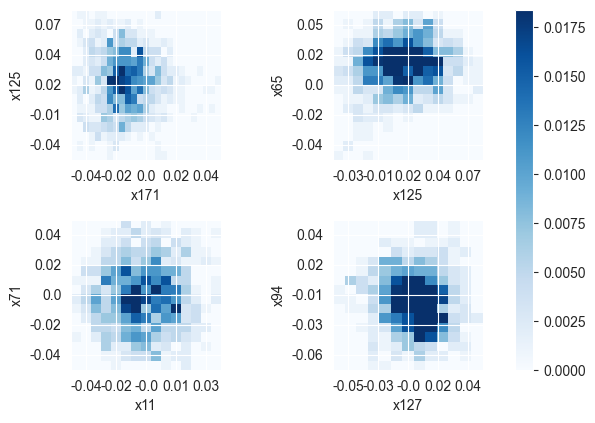

In [134]:
fig, ax = create_bins_plot(sghmc_samples, 2, cov, np.zeros(cov.shape[0]))
fig.show()

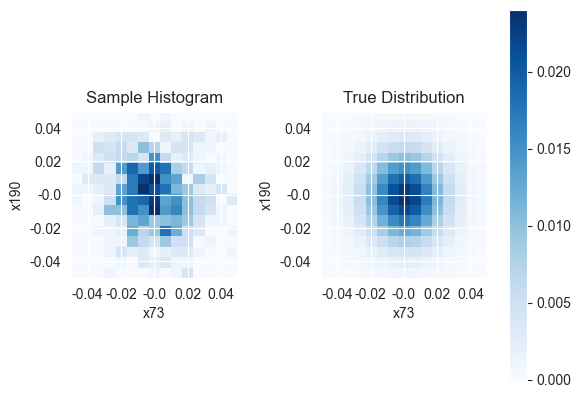

In [135]:
fig, ax = create_bins_plot_w_true(sghmc_samples, cov, np.zeros(cov.shape[0]), d1=73, d2=190, clim=(0, 0.024))

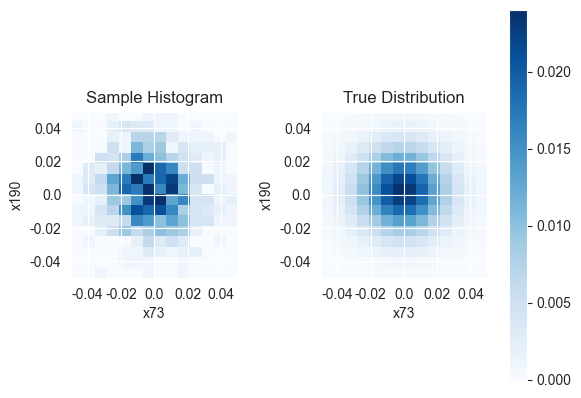

In [136]:
fig, ax = create_bins_plot_w_true(ls_samples_1e5, cov, np.zeros(cov.shape[0]), d1=73, d2=190, clim=(0, 0.024))

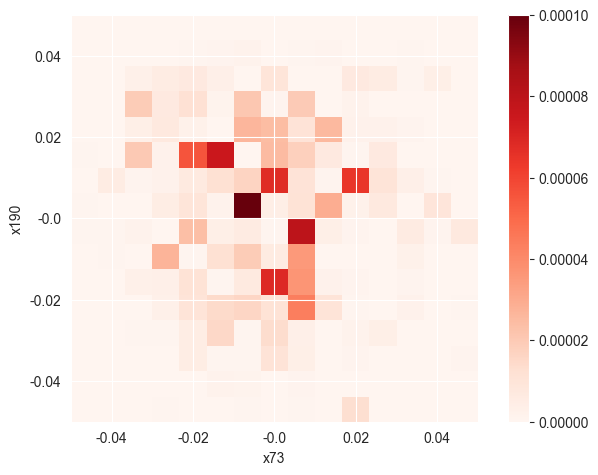

In [137]:
fig, ax = plot_difference_histogram(sghmc_samples, cov, np.zeros(cov.shape[0]), d1=73, d2=190)

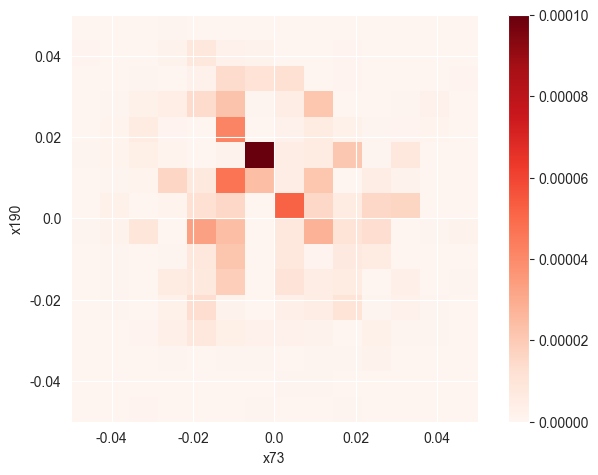

In [138]:
fig, ax = plot_difference_histogram(ls_samples_1e5, cov, np.zeros(cov.shape[0]), d1=73, d2=190)

In [139]:
# generate array of subsamples
subsample_factor = 10
subsample_size = int(n/subsample_factor)
subsampled_ls_1e5 = np.zeros((subsample_factor, subsample_size, d_dash))
subsampled_ls_1e6 = np.zeros((subsample_factor, subsample_size, d_dash))
subsampled_ls_1e4 = np.zeros((subsample_factor, subsample_size, d_dash))
subsampled_sghmc = np.zeros((subsample_factor, subsample_size, d_dash))
subsampled_sghmc_2 = np.zeros((subsample_factor, subsample_size, d_dash))
subsampled_sghmc_3 = np.zeros((subsample_factor, subsample_size, d_dash))
np.random.shuffle(ls_samples_1e5)
np.random.shuffle(ls_samples_1e6)
np.random.shuffle(ls_samples_1e4)
np.random.shuffle(sghmc_samples)
np.random.shuffle(sghmc_samples_2)
np.random.shuffle(sghmc_samples_3)
for i in range(subsample_factor):
    subsampled_ls_1e5[i,:,:] = ls_samples_1e5[i*subsample_size:(i+1)*subsample_size]
    subsampled_ls_1e6[i,:,:] = ls_samples_1e6[i*subsample_size:(i+1)*subsample_size]
    subsampled_ls_1e4[i,:,:] = ls_samples_1e4[i*subsample_size:(i+1)*subsample_size]
    subsampled_sghmc[i,:,:] = sghmc_samples[i*subsample_size:(i+1)*subsample_size]
    subsampled_sghmc_2[i,:,:] = sghmc_samples_2[i*subsample_size:(i+1)*subsample_size]
    subsampled_sghmc_3[i,:,:] = sghmc_samples_3[i*subsample_size:(i+1)*subsample_size]

In [140]:
# compute covariance matrices for each subsampled array
ls_covs_1e5 = np.zeros((subsample_factor, d_dash, d_dash))
ls_covs_1e6 = np.zeros((subsample_factor, d_dash, d_dash))
ls_covs_1e4 = np.zeros((subsample_factor, d_dash, d_dash))
sghmc_covs = np.zeros((subsample_factor, d_dash, d_dash))
sghmc_covs_2 = np.zeros((subsample_factor, d_dash, d_dash))
sghmc_covs_3 = np.zeros((subsample_factor, d_dash, d_dash))
for i in range(subsample_factor):
    ls_covs_1e5[i,:,:] = compute_empirical_cov(subsampled_ls_1e5[i,:,:])
    ls_covs_1e6[i,:,:] = compute_empirical_cov(subsampled_ls_1e6[i,:,:])
    ls_covs_1e4[i,:,:] = compute_empirical_cov(subsampled_ls_1e4[i,:,:])
    sghmc_covs[i,:,:] = compute_empirical_cov(subsampled_sghmc[i,:,:])
    sghmc_covs_2[i,:,:] = compute_empirical_cov(subsampled_sghmc_2[i,:,:])
    sghmc_covs_3[i,:,:] = compute_empirical_cov(subsampled_sghmc_3[i,:,:])

In [141]:
# compute differences from true cov
ls_mse_1e5 = np.zeros(subsample_factor)
ls_mse_1e6 = np.zeros(subsample_factor)
ls_mse_1e4 = np.zeros(subsample_factor)
sghmc_mse = np.zeros(subsample_factor)
sghmc_mse_2 = np.zeros(subsample_factor)
sghmc_mse_3 = np.zeros(subsample_factor)
for i in range(subsample_factor):
    ls_mse_1e5[i] = np.linalg.norm(cov - ls_covs_1e5[i])**2
    ls_mse_1e6[i] = np.linalg.norm(cov - ls_covs_1e6[i])**2
    ls_mse_1e4[i] = np.linalg.norm(cov - ls_covs_1e4[i])**2
    sghmc_mse[i] = np.linalg.norm(cov - sghmc_covs[i])**2
    sghmc_mse_2[i] = np.linalg.norm(cov - sghmc_covs_2[i])**2
    sghmc_mse_3[i] = np.linalg.norm(cov - sghmc_covs_3[i])**2

/tmp/ipykernel_24785/2988640881.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['2e-5', '3e-5', '4e-5', '5e-5', '6e-5', '7e-5', '8e-5', '9e-5'])


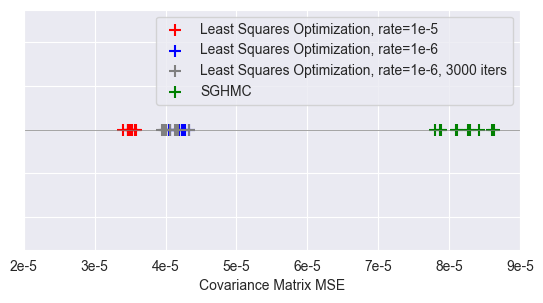

In [142]:
fig, ax = plt.subplots()
plt.plot(np.linspace(2e-5, 9e-5, num=2), np.zeros(2), linewidth=0.5, color='gray')
ax.scatter(ls_mse_1e5, np.zeros_like(ls_mse_1e5), color='r', marker='+', label='Least Squares Optimization, rate=1e-5', s=75)
ax.scatter(ls_mse_1e6, np.zeros_like(ls_mse_1e5), color='b', marker='+', label='Least Squares Optimization, rate=1e-6', s=75)
ax.scatter(ls_mse_1e4, np.zeros_like(ls_mse_1e5), color='gray', marker='+', label='Least Squares Optimization, rate=1e-6, 3000 iters', s=75)
ax.scatter(sghmc_mse, np.zeros_like(ls_mse_1e5), color='g', marker='+', label='SGHMC', s=75)
ax.set_yticklabels([])
plt.subplots_adjust(top=0.6,
                bottom=0.1)
ax.set_xlim(2e-5, 9e-5)
ax.set_xticklabels(['2e-5', '3e-5', '4e-5', '5e-5', '6e-5', '7e-5', '8e-5', '9e-5'])
ax.set_xlabel("Covariance Matrix MSE")
ax.legend()

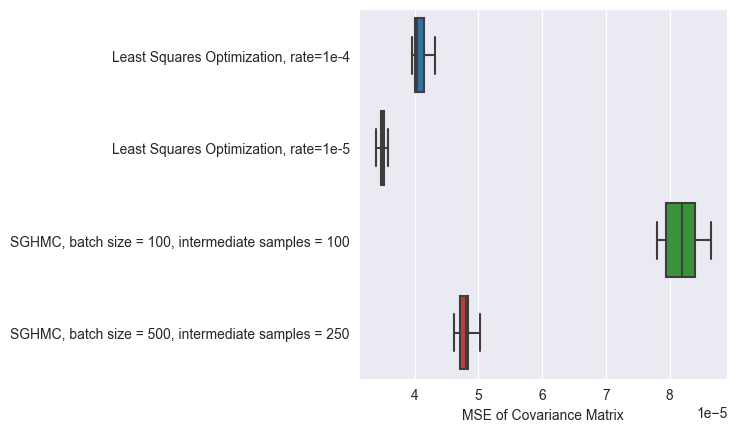

In [146]:
fig, ax = plt.subplots()
sns.set_style('darkgrid')
ax = sns.boxplot(
    data={
        'data': np.hstack((
            ls_mse_1e4, 
            ls_mse_1e5, 
            #ls_mse_1e6,
            sghmc_mse,
            sghmc_mse_2,
            #sghmc_mse_3
        )), 
        'labels':np.hstack((
            np.full(subsample_factor, 'Least Squares Optimization, rate=1e-4'), 
            np.full(subsample_factor, 'Least Squares Optimization, rate=1e-5'), 
            #np.full(subsample_factor, 'Least Squares Optimization, rate=1e-6'),
            np.full(subsample_factor, 'SGHMC, batch size = 100, intermediate samples = 100'),
            np.full(subsample_factor, 'SGHMC, batch size = 500, intermediate samples = 250'),
            #np.full(subsample_factor, 'SGHMC, batch size = 500, intermediate samples = 100')
    ))}, 
    x='data', 
    y='labels'
)
ax.set_xlabel("MSE of Covariance Matrix")
plt.subplots_adjust(right=0.7)